Спочатку треба розбити датасет на train, validation, test. Для цього будемо обирати останній запис з кожного користувача. Я розділю датасет на дві частини: користувачі з >3 записів, користувачі з 3 і менше записів. Так як в тестовому датасеті у нас є користувачі з дуже малою кількістю записів, буде цікаво перевірити, як добре працює у нас zero-shot learning. Тобто в validation set підуть три останні записи користувача, і для тих, у кого 3 і менше записів це буде означати, що модель взагалі на них не тренується. Але це добре, бо ми перевіримо якість моделі для zero-shot learning.

In [18]:
# read data
import pandas as pd

path_to_train = './data/train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8', usecols=['ts_listen', 'user_id'])
train['index'] = train.index

In [20]:
train = train.sort_values(by='ts_listen', axis=0)
train.head()

,ts_listen,user_id,index
5010516,1,4606,5010516
1309460,2,7557,1309460
824607,2,5034,824607
5321927,2,13875,5321927
5010515,3,4606,5010515


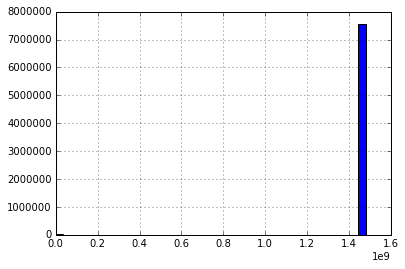

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

train["ts_listen"].hist(bins=40)

In [4]:
len(train[train["ts_listen"] < 1000000000])

631

Випадково побачив, що у деяких користувачів битий ts_listen, котрий має бути дуже великий. Честно - і фіг з ними. Всього 631 таких записів.

In [21]:
by_user = train.groupby(['user_id'], as_index=False).last()
by_user.head()

,user_id,ts_listen,index
0,0,1480614172,3613097
1,1,1480601602,401758
2,2,1480561724,414963
3,3,1480628912,4413990
4,4,1480571369,4461574


In [22]:
by_user[by_user["user_id"] == 4606]

,user_id,ts_listen,index
4606,4606,1480625001,5857939


In [24]:
by_user['index'].head()

0    3613097
1     401758
2     414963
3    4413990
4    4461574
Name: index, dtype: int64

In [29]:
set(by_user['index'])

{4690768,
 1933312,
 5210115,
 3899398,
 3735562,
 4019543,
 5472268,
 4030479,
 447832,
 3440664,
 2981917,
 3866655,
 7050007,
 5592411,
 4358181,
 5963814,
 2359335,
 6206349,
 4784171,
 3080236,
 3801134,
 5341231,
 4489264,
 1736753,
 3735603,
 3768372,
 622645,
 1114166,
 557113,
 6160442,
 5264735,
 1867786,
 5603391,
 7438400,
 1611104,
 1146947,
 2490436,
 5111878,
 6815815,
 1081416,
 6717513,
 3899466,
 2097229,
 129844,
 524371,
 786516,
 3883022,
 2031703,
 7174183,
 4128858,
 2687067,
 4017297,
 2883677,
 5537886,
 1572961,
 2228322,
 3244132,
 5210213,
 262247,
 6422632,
 7438441,
 7345491,
 1474667,
 5210220,
 2378667,
 4259951,
 5341296,
 7241841,
 862910,
 1310844,
 131198,
 5111935,
 5308544,
 6728384,
 6488194,
 917635,
 5963908,
 7209094,
 7110791,
 3375241,
 3539082,
 708627,
 3833996,
 5963917,
 5701774,
 6094992,
 4030609,
 2949266,
 852115,
 3014806,
 4948119,
 4456601,
 819354,
 2640082,
 1867932,
 4882589,
 5537950,
 2697925,
 491680,
 491681,
 6482630,
 6422

In [28]:
set(set(train.index) - set(by_user['index']))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [33]:
tr_vals = list(set(train.index) - set(by_user['index']))

In [ ]:
is_bigger = train.loc[tr_vals].apply(lambda row: row['ts_listen'] < by_user[by_user["user_id"] == row["user_id"]]["ts_listen"].iloc[0] ,axis=1)
is_bigger

In [41]:
train.loc[list(by_user['index'])]

,ts_listen,user_id,index
3613097,1480614172,0,3613097
401758,1480601602,1,401758
414963,1480561724,2,414963
4413990,1480628912,3,4413990
4461574,1480571369,4,4461574
6815419,1480609794,5,6815419
6313102,1480162158,6,6313102
6698034,1479821639,7,6698034
6297062,1480612337,8,6297062
3115069,1480452128,9,3115069


Тепер я просто зберу це в лібу